In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [86]:
df = pd.read_csv('action_log/2025-03-05_15:43:27/gen_2.csv', index_col=0)
df

,0,1,2,3,4,5,6,7
0.60,6.0,0.0,8.0,25.0,0.0,8.0,4.0,7.0
0.62,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
0.63,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0
0.64,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0
0.66,0.0,0.0,2.0,38.0,0.0,2.0,0.0,0.0
0.67,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0
0.68,2.0,0.0,5.0,32.0,0.0,2.0,1.0,2.0
0.69,1.0,0.0,6.0,0.0,0.0,3.0,0.0,2.0
0.70,1.0,0.0,10.0,30.0,0.0,3.0,19.0,4.0
0.71,3.0,0.0,13.0,0.0,0.0,4.0,1.0,6.0


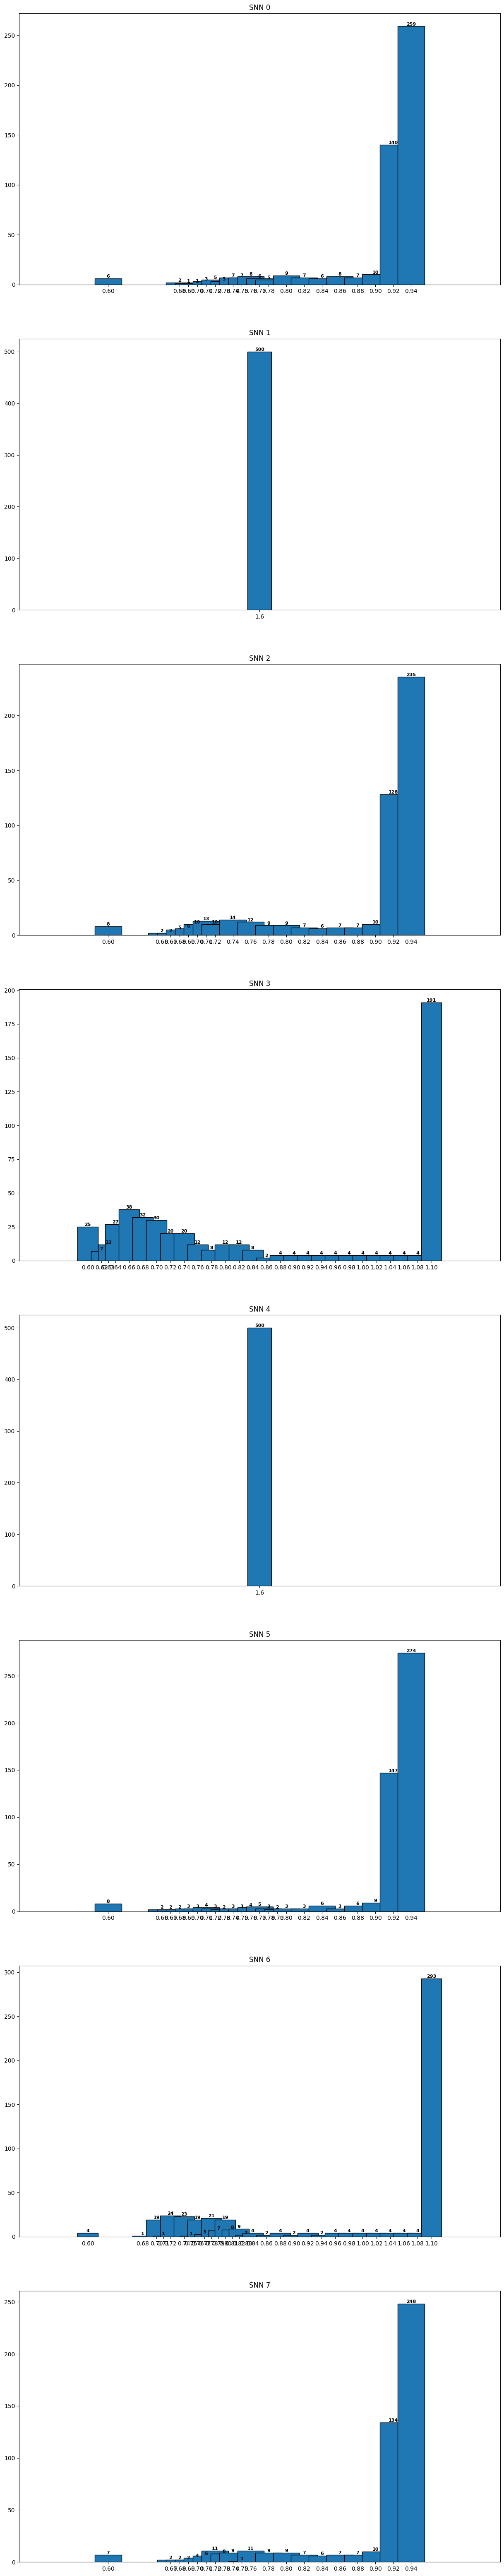

In [130]:
fig, ax = plt.subplots(8, 1, figsize=(15, 80))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    non_zero_mask = df[col] != 0  # Mask to filter non-zero values
    non_zero_x = df.index[non_zero_mask]  # Use actual index values
    non_zero_y = df[col][non_zero_mask]

    bar_width = 0.03 if len(non_zero_x) > 1 else 0.01

    bars = ax[i].bar(non_zero_x, non_zero_y, edgecolor='black', width=bar_width)
    ax[i].set_title(f"SNN {col}")

    ax[i].set_xticks(non_zero_x)
    ax[i].set_xlim([non_zero_x.min() - 0.1, non_zero_x.max() + 0.1])

    for bar, x in zip(bars, non_zero_x):
        height = bar.get_height()
        ax[i].text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.show()

In [120]:
next(zip(bars, non_zero_x))

(<matplotlib.patches.Rectangle at 0x7fd05df17130>, 0.6)